In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
#Load the dataset
df = pd.read_csv('/content/tweet_emotions .csv')

In [ ]:
#information about the Dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [ ]:
#read the Dataframe
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
#shape of the Dataframe
df.shape

(40000, 3)

In [ ]:
#display the first few rows of DataFrame
print(df.head)

<bound method NDFrame.head of          tweet_id   sentiment  \
0      1956967341       empty   
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommi

In [ ]:
#calculate the number of missing value
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

Data Preprocessing

In [ ]:
#remove rows with missing values
df=df.dropna()

In [ ]:
import nltk

In [ ]:
#data cleaning : remove irrelevant characters,hashtags,URLs,mentions,special symbols


In [ ]:
#  Remove irrelevant columns
df = df[['tweet_id', 'sentiment', 'content']]

In [ ]:
#  Data cleaning
import re
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

df['content'] = df['content'].apply(clean_text)


In [ ]:
df

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,Layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON
4,1956968416,neutral,dannycastillo We want to trade with someone wh...
...,...,...,...
39995,1753918954,neutral,JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mothers Day to all the mommies out there...
39998,1753919043,happiness,niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT ...


In [ ]:
#Convert text to lowercase
df['content'] = df['content'].str.lower()

In [ ]:
df

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends soon
4,1956968416,neutral,dannycastillo we want to trade with someone wh...
...,...,...,...
39995,1753918954,neutral,johnlloydtaylor
39996,1753919001,love,happy mothers day all my love
39997,1753919005,love,happy mothers day to all the mommies out there...
39998,1753919043,happiness,niariley wassup beautiful follow me peep out ...


In [ ]:
 #Tokenization
 #Tokenization is an essential step in NLP that splits text into individual words or tokens
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['tokens'] = df['content'].apply(word_tokenize)#created a new coloumn called 'tokens'that contains the tokenized versions of the tweets.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df

,tweet_id,sentiment,content,tokens
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...,"[tiffanylue, i, know, i, was, listenin, to, ba..."
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on y...,"[layin, n, bed, with, a, headache, ughhhhwaiti..."
2,1956967696,sadness,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]"
4,1956968416,neutral,dannycastillo we want to trade with someone wh...,"[dannycastillo, we, want, to, trade, with, som..."
...,...,...,...,...
39995,1753918954,neutral,johnlloydtaylor,[johnlloydtaylor]
39996,1753919001,love,happy mothers day all my love,"[happy, mothers, day, all, my, love]"
39997,1753919005,love,happy mothers day to all the mommies out there...,"[happy, mothers, day, to, all, the, mommies, o..."
39998,1753919043,happiness,niariley wassup beautiful follow me peep out ...,"[niariley, wassup, beautiful, follow, me, peep..."


In [ ]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

df['tokens'] = df['tokens'].apply(remove_stopwords)

In [ ]:
df

,tweet_id,sentiment,content,tokens
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...,"[tiffanylue, know, listenin, bad, habit, earli..."
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on y...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends soon,"[wants, hang, friends, soon]"
4,1956968416,neutral,dannycastillo we want to trade with someone wh...,"[dannycastillo, want, trade, someone, houston,..."
...,...,...,...,...
39995,1753918954,neutral,johnlloydtaylor,[johnlloydtaylor]
39996,1753919001,love,happy mothers day all my love,"[happy, mothers, day, love]"
39997,1753919005,love,happy mothers day to all the mommies out there...,"[happy, mothers, day, mommies, woman, man, lon..."
39998,1753919043,happiness,niariley wassup beautiful follow me peep out ...,"[niariley, wassup, beautiful, follow, peep, ne..."


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Apply stemming or lemmatization
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def apply_stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['tokens'] = df['tokens'].apply(apply_stemming)

In [ ]:
# Print the preprocessed data
print(df.head())

     tweet_id   sentiment                                            content  \
0  1956967341       empty  tiffanylue i know  i was listenin to bad habit...   
1  1956967666     sadness  layin n bed with a headache  ughhhhwaitin on y...   
2  1956967696     sadness                      funeral ceremonygloomy friday   
3  1956967789  enthusiasm                wants to hang out with friends soon   
4  1956968416     neutral  dannycastillo we want to trade with someone wh...   

                                              tokens  
0  [tiffanylu, know, listenin, bad, habit, earlie...  
1       [layin, n, bed, headach, ughhhhwaitin, call]  
2                    [funer, ceremonygloomi, friday]  
3                         [want, hang, friend, soon]  
4  [dannycastillo, want, trade, someon, houston, ...  


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Bag-of-Words (BoW) representation
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df['content'])

In [ ]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['content'])

In [ ]:
# Print the shape of the feature matrices
print("Bag-of-Words (BoW) feature matrix shape:", bow_features.shape)
print("TF-IDF feature matrix shape:", tfidf_features.shape)

Bag-of-Words (BoW) feature matrix shape: (40000, 50092)
TF-IDF feature matrix shape: (40000, 50092)


Model Building and Evaluation

 Support Vector Machines (SVM) classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_features, df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Choose a machine learning algorithm (e.g., Support Vector Machines - SVM)
model = SVC()

In [ ]:
# Train the model on the training set
model.fit(X_train, y_train)

SVC()

In [ ]:
# Predict labels for the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)



Accuracy: 0.3485
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.35      0.36      0.35      1028
        hate       0.50      0.13      0.20       268
        love       0.52      0.31      0.39       762
     neutral       0.35      0.61      0.44      1740
      relief       0.33      0.00      0.01       352
     sadness       0.41      0.14      0.21      1046
    surprise       0.35      0.02      0.03       425
       worry       0.31      0.56      0.40      1666

    accuracy                           0.35      8000
   macro avg       0.24      0.16      0.16      8000
weighted avg       0.34      0.35      0.30      8000



Naive Bayes

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)



In [80]:
# Convert the text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


In [81]:
# Build the Naive Bayes classifier
naive_bayes_model = MultinomialNB()

# Train the Naive Bayes model
naive_bayes_model.fit(X_train_features, y_train)

MultinomialNB()

In [82]:
# Predict labels for the testing set
y_pred = naive_bayes_model.predict(X_test_features)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics and classification report
print("Naive Bayes Model Accuracy:", accuracy)
print("Naive Bayes Model Classification Report:")
print(report)

Naive Bayes Model Accuracy: 0.304625
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.35      0.28      0.31      1028
        hate       0.50      0.01      0.02       268
        love       0.52      0.27      0.36       762
     neutral       0.34      0.34      0.34      1740
      relief       0.00      0.00      0.00       352
     sadness       0.31      0.09      0.14      1046
    surprise       0.50      0.00      0.00       425
       worry       0.27      0.76      0.39      1666

    accuracy                           0.30      8000
   macro avg       0.21      0.13      0.12      8000
weighted avg       0.31      0.30      0.25      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 3: Model Building and Evaluation

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Convert the text to numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Build the Logistic Regression classifier
lr_model = LogisticRegression()

# Train the Logistic Regression model
lr_model.fit(X_train_features, y_train)

# Predict labels for the testing set
y_pred = lr_model.predict(X_test_features)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics and classification report
print("Logistic Regression Model Accuracy:", accuracy)
print("Logistic Regression Model Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model Accuracy: 0.350125
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.11      0.01      0.03       338
   happiness       0.34      0.41      0.37      1028
        hate       0.49      0.16      0.24       268
        love       0.50      0.40      0.44       762
     neutral       0.35      0.49      0.41      1740
      relief       0.34      0.03      0.06       352
     sadness       0.33      0.28      0.30      1046
    surprise       0.33      0.06      0.10       425
       worry       0.32      0.50      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.27      0.18      0.18      8000
weighted avg       0.34      0.35      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 3: Model Building and Evaluation

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Convert the text to numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Build the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(X_train_features, y_train)

# Predict labels for the testing set
y_pred = rf_model.predict(X_test_features)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics and classification report
print("Random Forest Model Accuracy:", accuracy)
print("Random Forest Model Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model Accuracy: 0.32425
Random Forest Model Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.08      0.01      0.01       338
   happiness       0.33      0.27      0.29      1028
        hate       0.44      0.11      0.17       268
        love       0.48      0.35      0.41       762
     neutral       0.32      0.59      0.41      1740
      relief       0.06      0.00      0.01       352
     sadness       0.34      0.17      0.22      1046
    surprise       0.22      0.02      0.03       425
       worry       0.30      0.49      0.37      1666

    accuracy                           0.32      8000
   macro avg       0.20      0.15      0.15      8000
weighted avg       0.30      0.32      0.28      8000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluate the model's performance

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Analyze evaluation metrics
confusion_mat = confusion_matrix(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_mat)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Confusion Matrix:
[[   0    0    0    0    0    1    0    0    8    0    0    0   10]
 [   0    0    0    0    0    3    0    1    9    0    4    0   14]
 [   0    0    0    0    0   10    1    2   93    0    5    0   51]
 [   0    0    0    0    2   24    0    2   84    0    2    1   48]
 [   0    0    0    0    0   72    1   15  139    0    4    0  107]
 [   0    0    0    0    1  371    1   73  348    0   12    4  218]
 [   0    0    0    0    0    7   34    1   76    0   15    0  135]
 [   0    0    0    0    0  180    1  240  176    1   18    1  145]
 [   0    0    0    0    0  126    2   39 1054    0   36    1  482]
 [   0    0    0    0    0   79    0   21  127    1   12    2  110]
 [   0    0    1    0    2   38   13   24  264    1  147    1  555]
 [   0    0    0    0    0   58    2   18  155    0    5    7  180]
 [   0    0    0    0    2   97   13   29  491    0   97    3  934]]
Precision: 0.3386141019320818
Recall: 0.3485
F1-Score: 0.2987018035991265


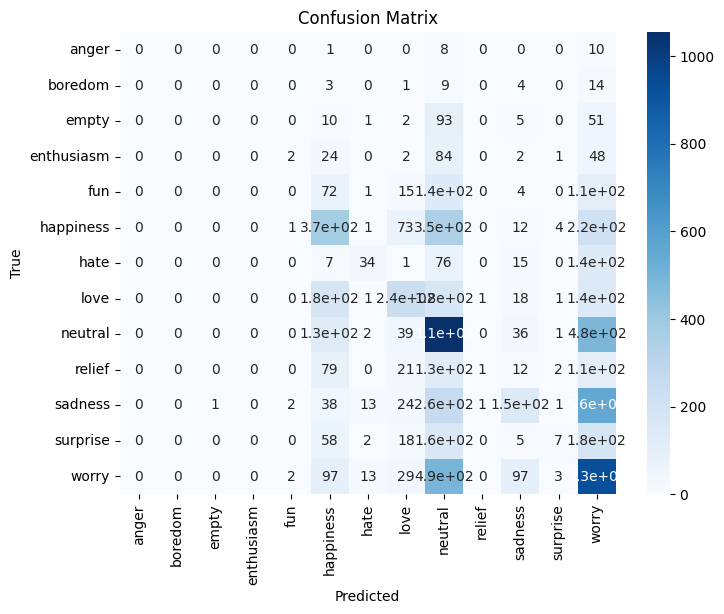

In [ ]:
# Visualize the confusion matrix
labels = sorted(df['sentiment'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()